<a href="https://colab.research.google.com/github/rayner-p/Simulacion/blob/main/Prueba2_Simulacioj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<div align='center'>**Universidad Politécnica Salesiana**
##<div align='center'>Alumno: *Rayner Palta*

##<div align='center'>Materia: *Simulación.*
##<div align='center'>

---


###I


#Datos:


---


###Provincia escogida: **Azuay**
###Cantón: **Cuenca**
###Plantel educativo: **Manuel Jota Calle**


---
###Docentes: *208*
###Alumnos: *5673*



In [2]:
pip install simpy

In [5]:
import simpy
import random as rd

In [13]:
totalDocentes= 208
totalAlumnos = 5673
print(totalAlumnos, totalDocentes)


total_poblacion= (totalDocentes+totalAlumnos)

docentes_vacunados = int((totalDocentes*90/100))
print('docentes vacunados', docentes_vacunados)
alumnosPCR = int((totalAlumnos*10/100))
print('total alumnos a prueba PCR', alumnosPCR)

alumnos_no_asisten = int((totalAlumnos*rd.randint(5,10)/100))

print('alumnos con problemas de salud o no vacunados', alumnos_no_asisten)

#Horario_atncion
horarioClases=6
horarioReceso=30
diasLaborales=5
diasMes =31

# Tiempo de simulación
tiempoSimulacion = ((60*6)*5)*31
alumnos_contagiadosPCR =[]
alumnos_contagiadosReceso =[]
alumnos_mes =[]
docentes_mes=[]


5673 208
docentes vacunados 187
total alumnos a prueba PCR 567
alumnos con problemas de salud o no vacunados 510


In [14]:
class procesoRegresoClases(object):
  def __init__(self, environment, lugar):
    self.env=environment
    self.lugarRegreso = simpy.Resource(environment)
    self.lugar = lugar
  
    #espera 31 periodo prueba
  def analisisPrevioMes(self, alumnos):
    print('ENTRO A PERIODO DE PRUEBA')
    yield self.env.timeout(31)
    print('El',alumnos,'está en periodo de prueba de un mes' )
    alumnos_mes.append(alumnos)
    #Proceso prueba pcr a los alumnos
  def analisisPCR(self, alumnos):
    print('---Inicio PCR-----')
    yield self.env.timeout(5) 
    alumnos = alumnosPCR
    alumnos_contagiados2 = int((alumnos*2/100)) 
    alumnos_contagiadosPCR.append(alumnos_contagiados2)
    print('el alumno',alumnos, 'sale de su prueba PCR')
  
  def receso(self, alumnos):
    print('receso 30 min')
    yield self.env.timeout(horarioReceso) 
    focoContagioAlumnos = int((totalAlumnos*2/100))
    alumnos_contagiadosReceso.append(focoContagioAlumnos)
    print('se acaba el receso para el alumno', alumnos)

  def clases (self, alumnos, docentes):
    print('clases')   
    docentes_mes.append(docentes)
    yield self.env.timeout(3) 
    receso = procesoRegresoClases.receso
    yield self.env.timeout(3) 
    print('acaba clases')

def proceso_regreso_alumnos(env, alumno,punto, docentes):
  print(' ')
  print("Llega el alumno",alumno, "a las",str(env.now))
  with punto.lugarRegreso.request() as lugar:
    yield lugar
    print(' ')
    print('Ingresa al periodo de prueba el alumno',alumno, "a las:",str(env.now))
    yield env.process(punto.analisisPrevioMes(alumno))
    print(' ')
    print('Ingresa al analisis de prueba PCR el',alumno, "a las:",str(env.now))
    yield env.process(punto.analisisPCR(alumno))
    print(' ')
    print('El alumno ',alumno,'entro al clases a las: ',str(env.now),'con el docente', docentes)
    yield env.process(punto.clases(alumno, docentes))
    print(' ')
    print('El alumno ',alumno,'entro al receso a las: ',str(env.now))
    yield env.process(punto.receso(alumno))

       
def principal(env, alumno, docente):
  #ejecutamos la clase
  lugar = procesoRegresoClases(env,'Manuel Jota Calle')
   
  alumnosSinRegreso = alumnos_no_asisten
  print('Total de alumnos que no asisten a clases son: ',alumnosSinRegreso)


  for total in range(alumno):
    env.process(proceso_regreso_alumnos(env,'Alumno %d'%(total+1), lugar, docente))
  while True:
    #yield env.timeout(rd.expovariate(1.5))
    yield env.timeout(5) #5 min por alumno
    total+=1
    env.process(proceso_regreso_alumnos(env,'Alumno %d'%(total+1), lugar,docente))
        


In [15]:
print("Regreso a clases")
env=simpy.Environment()
print("Total de alumnos => ", totalAlumnos)
print("Total de docentes => ", totalDocentes)

env.process(principal(env,totalAlumnos,totalDocentes))
env.run(until = tiempoSimulacion)

Streaming output truncated to the last 5000 lines.
El Alumno 664 está en periodo de prueba de un mes
 
Ingresa al analisis de prueba PCR el Alumno 664 a las: 47767
---Inicio PCR-----
 
Llega el alumno Alumno 15227 a las 47770
el alumno 567 sale de su prueba PCR
 
El alumno  Alumno 664 entro al clases a las:  47772 con el docente 208
clases
 
Llega el alumno Alumno 15228 a las 47775
acaba clases
 
El alumno  Alumno 664 entro al receso a las:  47778
receso 30 min
 
Llega el alumno Alumno 15229 a las 47780
 
Llega el alumno Alumno 15230 a las 47785
 
Llega el alumno Alumno 15231 a las 47790
 
Llega el alumno Alumno 15232 a las 47795
 
Llega el alumno Alumno 15233 a las 47800
 
Llega el alumno Alumno 15234 a las 47805
se acaba el receso para el alumno Alumno 664
 
Ingresa al periodo de prueba el alumno Alumno 665 a las: 47808
ENTRO A PERIODO DE PRUEBA
 
Llega el alumno Alumno 15235 a las 47810
 
Llega el alumno Alumno 15236 a las 47815
 
Llega el alumno Alumno 15237 a las 47820
 
Llega el 

In [16]:
totalContagiosMes= len(alumnos_contagiadosReceso)+len(alumnos_contagiadosPCR)
totalAlumnosMes =len(alumnos_mes)
totalDocnteMes =len(docentes_mes)
print('total de alumnos contagiados: ',totalContagiosMes)
print('total de alumnos que asisten al mes: ', totalAlumnosMes)
print( 'total de docentes por mes:',totalDocnteMes)

total de alumnos contagiados:  1549
total de alumnos que asisten al mes:  775
total de docentes por mes: 775


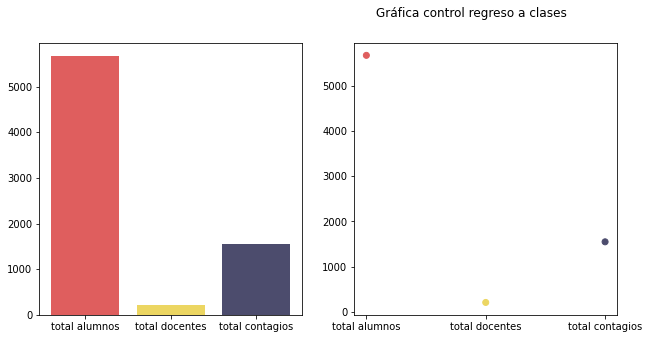

In [21]:
import matplotlib.pyplot as plt

nombre2 = [ 'total alumnos','total docentes', 'total contagios']
datos2 = [totalAlumnos,totalDocentes, totalContagiosMes]
fig = plt.figure(figsize=(16,5))
plt.subplot(131)
plt.bar(nombre2, datos2, color=['#DF5E5E', '#ECD662', '#4C4C6D'])
plt.subplot(132)
plt.scatter(nombre2, datos2, color=['#DF5E5E', '#ECD662', '#4C4C6D'])
plt.suptitle('Gráfica control regreso a clases')

plt.show()

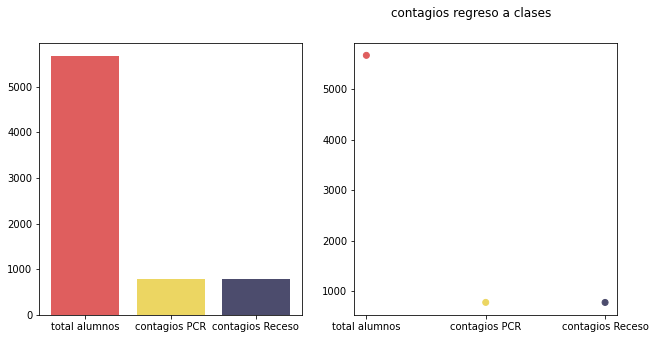

In [22]:
nombre = [ 'total alumnos','contagios PCR', 'contagios Receso']
datos = [totalAlumnos, len(alumnos_contagiadosPCR), len(alumnos_contagiadosReceso)]
fig = plt.figure(figsize=(16,5))

plt.subplot(131)
plt.bar(nombre, datos, color=['#DF5E5E', '#ECD662', '#4C4C6D'])
plt.subplot(132)
plt.scatter(nombre, datos, color=['#DF5E5E', '#ECD662', '#4C4C6D'])
plt.suptitle('contagios regreso a clases')

plt.show()

#Recomendaciones
###Se recomienda el mantener distanciamiento dentro del plantel educativo en el receso de los alumno